In [23]:
import bioMass.dataViz as dv
from bioMass.dataloader import SentinelDataset
import matplotlib.pyplot as plt
import torch

%config Completer.use_jedi = False
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
dir_tiles = '/home/ubuntu/Thesis/backup_data/bioMass_data/train_PCA_warm/'
dir_target = '/home/ubuntu/Thesis/backup_data/bioMass_data/train_agbm/'

dataset = SentinelDataset(dir_tiles, dir_target)
len(dataset)

8689

In [ ]:
dataset.tile_list[0]

'0003d2eb'

In [9]:
channel_map = {
    0: 'S2-B2: Blue-10m',
    1: 'S2-B3: Green-10m',
    2: 'S2-B4: Red-10m',
    3: 'S2-B5: VegRed-704nm-20m',
    4: 'S2-B6: VegRed-740nm-20m',
    5: 'S2-B7: VegRed-780nm-20m',
    6: 'S2-B8: NIR-833nm-10m',
    7: 'S2-B8A: NarrowNIR-864nm-20m',
    8: 'S2-B11: SWIR-1610nm-20m',
    9: 'S2-B12: SWIR-2200nm-20m',
    10: 'S2-CLP: CloudProb-160m',
    11: 'S1-VV-Asc: Cband-10m',
    12: 'S1-VH-Asc: Cband-10m',
    13: 'S1-VV-Desc: Cband-10m',
    14: 'S1-VH-Desc: Cband-10m'
}

month_map = {
    0: 'Sep', 1: 'Oct', 2: 'Nov', 3: 'Dec',
    4: 'Jan', 5: 'Feb', 6: 'Mar', 7: 'Apr',
    8: 'May', 9: 'Jun', 10: 'Jul', 11: 'Aug'
}

plot_channels = {
    0: {'s2_rgb_idxs': [2, 1, 0], 'title': 'RGB'}, # RGB image, special case 
    1: {'data': 'target', 'title': 'AGBM'}, # AGBM target data, special case 
    2: {'channel_idx': 6},  # general case of visualizing by channel_index 
    3: {'channel_idx': 10},
    4: {'channel_idx': 12},
    5: {'channel_idx': 13}, 
    # 6: {'channel_idx': 16},
    # 7: {'s1_rgb_idxs': [11, 12, 16], 'title': 'SAR-RGB: VV,VH,VV/VH'}, # SAR psuedo-RGB, special case 
}

In [26]:
def plot_by_tile_index(dataset, tile_idx, plot_channels, channel_map):
    sample = dataset[tile_idx]
    chipid = dataset.tile_list[tile_idx]
    
    tile_name = f'Chip {chipid}'
    
    data = torch.concat((sample['image_s2'], sample['image_s1']))
    
    dv.plot_bands(tile=data.detach().cpu(),
               target=sample['label'].detach().cpu(),
               tile_name=tile_name,
               plot_channels=plot_channels,
               channel_map=channel_map
              )

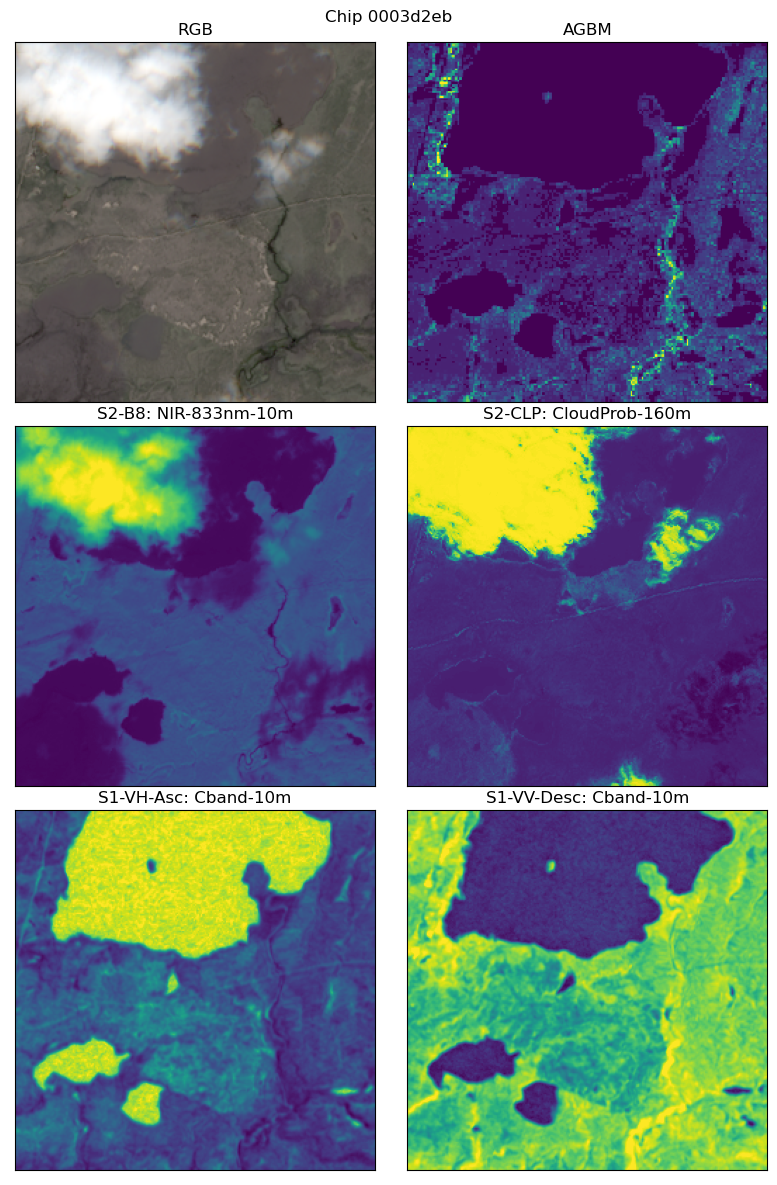

In [30]:
plot_by_tile_index(dataset, 0, plot_channels, channel_map)